In [37]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# stats models: regression fitting
import statsmodels.formula.api as smf
# data visualization
import seaborn as sns
from scipy.stats import t 
import statsmodels.api as sm
import io
import re
from statsmodels.iolib.summary2 import summary_params
from statsmodels.iolib.summary2 import summary_col
import scipy.stats as stats

## Ex 1

для датасета wage1 регрессия log(wage)~ exper+smsa+married+south оценить регрессию и проверить значимость коэффициента для exper 
указать тестовую статистику, критическое значение и сделать вывод. ответ до 3 десят знаков. уровень значимости 1%

In [5]:
df_wage1 = pd.read_csv('wage1.csv')
df_wage1.shape

(526, 24)

In [6]:
df_wage1.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [18]:
data = smf.ols(formula='np.log(wage)~exper+smsa+married+south',data=df_wage1).fit()
data.params.round(3)

Intercept    1.241
exper        0.002
smsa         0.259
married      0.305
south       -0.070
dtype: float64

In [32]:
data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     19.66
Date:                Tue, 02 May 2023   Prob (F-statistic):           4.40e-15
Time:                        00:37:37   Log-Likelihood:                -376.47
No. Observations:                 526   AIC:                             762.9
Df Residuals:                     521   BIC:                             784.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2411      0.061     20.402      0.000       1.122       1.361
exper          0.0020      0.002      1.187      0.236      -0.001       0.005
smsa           0.2594      0.050      5.173      0.000       0.161       0.358
married        0.3051      0.047      6.492      0.000       0.213       0.397
south         -0.0704      0.047     -1.510      0.132      -0.162       0.021
==============================================================================
Omnibus:                       15.934   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.406
Skew:                           0.370   Prob(JB):                     0.000166
Kurtosis:                       3.496   Cond. No.                         77.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
alpha = 0.01
print('Уровень значимости alpha: ', alpha)
DF = int(data.df_resid)
t_crit = scipy.stats.t.ppf(1-alpha/2, DF)
print('Критическое значение t_crit: ', t_crit.round(3))

Уровень значимости alpha:  0.01
Критическое значение t_crit:  2.585


In [34]:
data.t_test('exper=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0020      0.002      1.187      0.236      -0.001       0.005

если т тест > т крит, то значим
если нет, то не значим
так как t-test=1.187< t_crit=2.585 не значим

построить 90% доверительный интервал для коэффициента, округл до 3

In [39]:
data.conf_int(alpha=0.10).round(3) #y=0,90 a=0,10

,0,1
Intercept,1.141,1.341
exper,-0.001,0.005
smsa,0.177,0.342
married,0.228,0.383
south,-0.147,0.006


## EX 2

для датасета electricity регрессия log(cost) ~ log(q) +I(np.log(q)**2) оценить регр и проверить ее значимость через значения f！！！

In [38]:
df_el = pd.read_csv('electricity.csv')
df_el.shape

(158, 8)

In [39]:
df_el.head()

,cost,q,pl,sl,pk,sk,pf,sf
0,0.2130,8.0,6869.47,0.3291,64.945,0.4197,18.000,0.2512
1,3.0427,869.0,8372.96,0.1030,68.227,0.2913,21.067,0.6057
2,9.4059,1412.0,7960.90,0.0891,40.692,0.1567,41.530,0.7542
3,0.7606,65.0,8971.89,0.2802,41.243,0.1282,28.539,0.5916
4,2.2587,295.0,8218.40,0.1772,71.940,0.1623,39.200,0.6606


In [54]:
data1 = smf.ols(formula='np.log(cost)~ q + np.log(pl)+ np.log(pk)+ np.log(pf)',data=df_el)
ek=data1.fit()
df_el.shape

(158, 8)

In [55]:
f_value=ek.fvalue
print(np.round(el.fvalue,3))

39.931


In [57]:
alpha=0.01
dfn = int(ek.df_model)
dfd= int(ek.df_resid)
F_crit= stats.f.ppf(1-alpha, dfn, dfd)
F_crit.round(3)

3.444

In [58]:
if (f_value>F_crit): print ('регрессия значима')
else: print ('регрессия незначима')

регрессия значима


## proverka

Для набора данных Electricity рассмотрим линейную регрессию log(cost) на log(q), log(pl), log(pk), log(pf)

In [59]:
data2 = smf.ols(formula='np.log(cost)~np.log(q)+np.log(pl)+np.log(pk)+np.log(pf)',data=df_el).fit()
data2.params.round(3)

Intercept    -7.472
np.log(q)     0.838
np.log(pl)    0.044
np.log(pk)    0.188
np.log(pf)    0.713
dtype: float64

In [60]:
data2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(cost)   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     2107.
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.25e-132
Time:                        01:20:15   Log-Likelihood:                 25.928
No. Observations:                 158   AIC:                            -41.86
Df Residuals:                     153   BIC:                            -26.54
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.4722      1.063     -7.028      0.000      -9.573      -5.372
np.log(q)      0.8381      0.009     89.284      0.000       0.820       0.857
np.log(pl)     0.0443      0.106      0.418      0.676      -0.165       0.253
np.log(pk)     0.1884      0.087      2.164      0.032       0.016       0.360
np.log(pf)     0.7131      0.064     11.081      0.000       0.586       0.840
==============================================================================
Omnibus:                       43.278   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.870
Skew:                           1.123   Prob(JB):                     1.39e-24
Kurtosis:                       6.413   Cond. No.                         866.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
t_crit=t.ppf(q=1-0.01/2, df=data2.df_resid).round(3)
t_crit

2.608

In [69]:
summary_params(data2).round(3)

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-7.472,1.063,-7.028,0.000,-9.573,-5.372
np.log(q),0.838,0.009,89.284,0.000,0.820,0.857
np.log(pl),0.044,0.106,0.418,0.676,-0.165,0.253
np.log(pk),0.188,0.087,2.164,0.032,0.016,0.360
np.log(pf),0.713,0.064,11.081,0.000,0.586,0.840


In [70]:
table2 = pd.read_html(data2.summary().tables[1].as_html(), header=0, index_col=0)[0]

In [71]:
table2['significance'] = table2.apply(lambda x : 'Значим' if np.abs(x['t']) > t_crit else 'Незначим', axis = 1 )
table2

,coef,std err,t,P>|t|,[0.025,0.975],significance
Intercept,-7.4722,1.063,-7.028,0.000,-9.573,-5.372,Значим
np.log(q),0.8381,0.009,89.284,0.000,0.820,0.857,Значим
np.log(pl),0.0443,0.106,0.418,0.676,-0.165,0.253,Незначим
np.log(pk),0.1884,0.087,2.164,0.032,0.016,0.360,Незначим
np.log(pf),0.7131,0.064,11.081,0.000,0.586,0.840,Значим


## EX 3


In [82]:
df_electro = pd.read_csv('electricity.csv')
data3 = smf.ols(formula='np.log(cost)~ np.log(q)+np.log(pl)+np.log(pk)+np.log(pf)',data=df_electro)
el=data3.fit()
df.shape


(158, 8)

In [83]:
alpha=0.05
dfn = int(el.df_model)
dfd= int(el.df_resid)
F_crit= stats.f.ppf(1-alpha, dfn, dfd)
F_crit.round(3)

2.431

In [84]:
F_stat= el.f_test('np.log(pl)=np.log(pk)=np.log(pf)=0')
np.round(F_stat.fvalue,3)

47.812

In [86]:
if (F_stat.fvalue > F_crit): print('влияние значимо')
else: print('влияние не значимо')

влияние значимо


In [80]:
# критическое значение
stats.f.ppf(q=1-0.05, dfn=3, dfd=el.df_resid).round(3)

2.664

## EX4

для датасета labour рассмотрим регрессию log(output) na log(capital)+log(labour)+log(wage) оцените модель и тестируйте гипотезу $H_0: \quad \beta_1[log(wage)]=1$ 

In [101]:
df_la = pd.read_csv('labour.csv')
df_la.shape

(569, 4)

In [102]:
data4 = smf.ols(formula='np.log(output)~np.log(capital)+np.log(labour)+np.log(wage)',data=df_la).fit()
data4.params.round(3)

Intercept         -5.007
np.log(capital)    0.149
np.log(labour)     0.720
np.log(wage)       0.921
dtype: float64

In [103]:
# формулируем гипотезу
hypotheses = 'np.log(wage)=1' # Запись означает: коэффициент при регрессоре log(capital) равен 1
# проверяем гипотезу
data4.t_test(hypotheses)

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.9214      0.058     -1.365      0.173       0.808       1.034

In [100]:
alpha = 0.05
print('Уровень значимости alpha: ', alpha)
DF = int(data4.df_resid)
t_crit = stats.t.ppf(1-alpha/2, DF)
print('Критическое значение t_crit: ', t_crit.round(3))

Уровень значимости alpha:  0.05
Критическое значение t_crit:  1.964


In [105]:
# 5%-критическое значение t-распределения
t.ppf(q=1-0.05/2, df=data4.df_resid).round(3)

1.964

$ВЫВОД: так как |t-value|=1.365< t-crit=1.964=> не отвергаем H0 => коэффициент при регрессоре log(wage) незначимо отличается от числа 1$

## EX 5

для датасета sleep75 рассмотрим регрессию sleep na totwrk+age+I(age^2)+male+south+union
оценить значимость структурных сдвигов относительно dummy-переменной marr. укажите тестовую статистику, крит знач и сделайте вывод. ур знач 10%

In [92]:
df_sleep = pd.read_csv('sleep75.csv')
df_sleep.shape

(706, 34)

In [114]:
data5 = smf.ols(formula='sleep~totwrk+age+I(age ** 2)+male+south+union',data=df_sleep).fit()
data5.params.round(3)

Intercept      3613.676
totwrk           -0.167
age              -6.460
I(age ** 2)       0.112
male             89.823
south           115.317
union            16.732
dtype: float64

In [95]:
data5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sleep   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     17.09
Date:                Tue, 02 May 2023   Prob (F-statistic):           1.77e-18
Time:                        02:28:36   Log-Likelihood:                -5257.3
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     699   BIC:                         1.056e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3613.6758    218.560     16.534      0.000    3184.563    4042.788
totwrk         -0.1672      0.018     -9.212      0.000      -0.203      -0.132
age            -6.4598     11.207     -0.576      0.565     -28.464      15.544
I(age ** 2)     0.1116      0.134      0.833      0.405      -0.151       0.375
male           89.8231     34.307      2.618      0.009      22.465     157.181
south         115.3167     40.698      2.833      0.005      35.411     195.222
union          16.7319     38.128      0.439      0.661     -58.128      91.592
==============================================================================
Omnibus:                       60.830   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.145
Skew:                          -0.434   Prob(JB):                     2.27e-36
Kurtosis:                       5.197   Cond. No.                     3.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
df_sleep['sleep'] = df_sleep['sleep']

In [121]:
# Отфильтруем датафрейм по married признаку
sleep_marr = df_sleep[df_sleep['marr']==1] # Датафрейм для замужних
sleep_nmarr = df_sleep[df_sleep['marr']==0] # Датафрейм дла незамужних

In [122]:
slp = smf.ols(data= df_sleep, formula='sleep~totwrk+age+I(age ** 2)+male+south+union').fit()
slp_marr = smf.ols(data= sleep_marr, formula='sleep~totwrk+age+I(age ** 2)+male+south+union').fit()
slp_nmarr = smf.ols(data= sleep_nmarr, formula='sleep~totwrk+age+I(age ** 2)+male+south+union').fit()

In [123]:
print(f'RSS:{slp.ssr.round(2)}, RSS_1:{slp_marr.ssr.round(2)},RSS_2:{slp_marr.ssr.round(2)} ')

RSS:121431161.34, RSS_1:94436758.81,RSS_2:94436758.81 


In [125]:
F_obl =( slp.ssr - (slp_marr.ssr + slp_nmarr.ssr) )/((slp_marr.ssr + slp_nmarr.ssr)) * (len( sleep_nmarr ) + len( sleep_marr ) - 14) / 7
F_obl.round(3)

0.657

In [149]:
alpha = 0.10
F_crit=stats.f.ppf(1-alpha,7,len( sleep_nmarr ) + len( sleep_marr ) - 14  ).round(3)
F_crit

1.725

In [150]:
if (F_obl > F_crit):
    print('отвергаем H0, структурные изменения значимы')
else:
    print('не отвергаем H0, структурные изменения незначимы')

не отвергаем H0, структурные изменения незначимы


## PROVERKA IZ ART

In [136]:
#Определим датафрейм
sleep_df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
sleep_df['sleep60'] = sleep_df['sleep']/60 # создадим столбец часов времени
# Отфильтруем датафрейм по гендерному признаку
sleep_male = sleep_df[sleep_df['male']==1] # Датафрейм для мужчин
sleep_female = sleep_df[sleep_df['male']==0] # Датафрейм дла женщин

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sleep   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     17.09
Date:                Tue, 02 May 2023   Prob (F-statistic):           1.77e-18
Time:                        11:19:45   Log-Likelihood:                -5257.3
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     699   BIC:                         1.056e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3613.6758    218.560     16.534      0.000    3184.563    4042.788
totwrk         -0.1672      0.018     -9.212      0.000      -0.203      -0.132
age            -6.4598     11.207     -0.576      0.565     -28.464      15.544
I(age ** 2)     0.1116      0.134      0.833      0.405      -0.151       0.375
male           89.8231     34.307      2.618      0.009      22.465     157.181
south         115.3167     40.698      2.833      0.005      35.411     195.222
union          16.7319     38.128      0.439      0.661     -58.128      91.592
==============================================================================
Omnibus:                       60.830   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.145
Skew:                          -0.434   Prob(JB):                     2.27e-36
Kurtosis:                       5.197   Cond. No.                     3.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

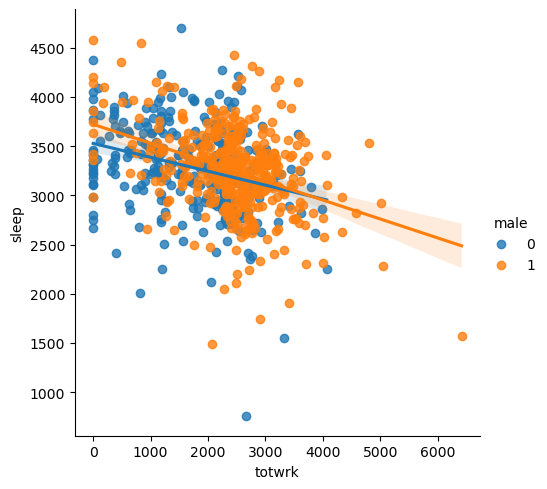

In [137]:
sns.lmplot(data=sleep_df, y='sleep', x='totwrk',hue='male')
slp.summary()

In [138]:
slp = smf.ols(data= sleep_df, formula='sleep60~totwrk+age+I(age**2)+south +smsa +marr').fit()
slp_ml = smf.ols(data= sleep_male, formula='sleep60~totwrk+age+I(age**2)+south +smsa +marr').fit()
slp_fml = smf.ols(data= sleep_female, formula='sleep60~totwrk+age+I(age**2)+south +smsa +marr').fit()

In [139]:
print(f'RSS:{slp.ssr.round(2)}, RSS_1:{slp_ml.ssr.round(2)},RSS_2:{slp_ml.ssr.round(2)} ')

RSS:33859.8, RSS_1:17618.98,RSS_2:17618.98 


In [146]:
F_obl1 =( slp.ssr - (slp_ml.ssr + slp_fml.ssr) )/((slp_ml.ssr + slp_fml.ssr)) * (len( sleep_female ) + len( sleep_male ) - 14) / 7
F_obl1.round(3)

1.551

In [147]:
alpha = 0.01
F_crit1=stats.f.ppf(1-alpha,7,len( sleep_female ) + len( sleep_male ) - 14  )
F_crit1.round(3)

2.665

In [148]:
if (F_obl1 > F_crit1):
    print('отвергаем H0, структурные изменения значимы')
else:
    print('не отвергаем H0, структурные изменения незначимы')

не отвергаем H0, структурные изменения незначимы


## EX 5 Берковское задание

In [108]:
df_sleep = pd.read_csv('sleep75.csv')
df_sleep.shape

(706, 34)

In [109]:
data6 = smf.ols(formula='sleep~totwrk+age+male+south+marr+union',data=df_sleep).fit()
data6.params.round(3)

Intercept    3410.808
totwrk         -0.168
age             2.800
male           84.384
south         118.082
marr           36.630
union          15.700
dtype: float64

In [115]:
# Отфильтруем датафрейм по признаку smsa
sleep_smsa = df_sleep[df_sleep['smsa']==1] # Датафрейм для живущих в мегаполисе
sleep_nsmsa = df_sleep[df_sleep['smsa']==0] # Датафрейм дла тех кто не живет в мегаполисе


In [116]:
slp = smf.ols(data= df_sleep, formula='sleep~totwrk+age+male+south+marr+union').fit()
slp_smsa = smf.ols(data= sleep_smsa, formula='sleep~totwrk+age+male+south+marr+union').fit()
slp_nsmsa = smf.ols(data= sleep_nsmsa, formula='sleep~totwrk+age+male+marr+south+union').fit()

In [117]:
print(f'RSS:{slp.ssr.round(3)}, RSS_1:{slp_smsa.ssr.round(3)},RSS_2:{slp_smsa.ssr.round(2)} ')

RSS:121418130.129, RSS_1:42632713.629,RSS_2:42632713.63 


---

In [118]:
df_sleep = pd.read_csv('sleep75.csv')
specification = 'sleep~totwrk+age+male+south+marr+union'
# подгонка по полному датасету
mod_overall = smf.ols(formula=specification, data=df_sleep).fit()
# подгонка только по М
mod_smsa = smf.ols(formula=specification, data=df_sleep[ df_sleep['smsa']==1 ]).fit()
# подгонка только по Ж
mod_no_smsa = smf.ols(formula=specification, data=df_sleep[ df_sleep['smsa']==0 ]).fit()
# Вывод трёх регрессий в одной таблице
summary_col(results=[mod_smsa, mod_no_smsa, mod_overall], stars=True, model_names=['мегаполис', 'нет мегаполиса', 'Общая'],
           info_dict={'N': lambda x: x.nobs, 'F-stat': lambda x: x.fvalue})

,мегаполис,нет мегаполиса,Общая
Intercept,3478.9308***,3373.0343***,3410.8078***
,(111.1708),(105.5365),(76.7741)
totwrk,-0.1871***,-0.1603***,-0.1678***
,(0.0281),(0.0239),(0.0180)
age,2.2962,3.2742*,2.8004**
,(2.0711),(1.8775),(1.3889)
male,97.3943*,84.6980*,84.3841**
,(53.1835),(46.8894),(34.9319)
south,167.6170*,87.3136*,118.0815***
,(92.9944),(48.0801),(40.6470)


In [119]:
# Ингредиенты тестовой статистики
print('RSS (overall)=', mod_overall.ssr)
print('RSS (smsa)=', mod_smsa.ssr)
print('RSS (no_smsa)=', mod_no_smsa.ssr)
print('n=', mod_overall.nobs)
print('k=', mod_overall.df_model)

RSS (overall)= 121418130.12945709
RSS (smsa)= 42632713.6289296
RSS (no_smsa)= 77893881.34161535
n= 706.0
k= 6.0


In [125]:
F = (mod_overall.ssr-mod_smsa.ssr-mod_no_smsa.ssr)/(mod_smsa.ssr+mod_no_smsa.ssr)*(mod_overall.nobs-2*(mod_overall.df_model+1))/(mod_overall.df_model+1)
F_cr = stats.f.ppf(q=1-0.1, dfn=mod_overall.df_model+1, dfd=mod_overall.nobs-2*(mod_overall.df_model+1))
F.round(3), F_cr.round(3)

(0.731, 1.725)

In [124]:
if (F > F_cr):
    print('отвергаем H0, структурные изменения значимы')
else:
    print('не отвергаем H0, структурные изменения незначимы')

не отвергаем H0, структурные изменения незначимы
